<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/sklearn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore') # 불필요한 경고 출력 방지

# **0.데이터 셋**

sklearn.dataset에서 제공해주는 다양한 샘플 데이터 활용
iris 데이터 셋을 활용해보자.

### **0-1. iris 데이터 셋**

Mission: 꽃 종류 분류하기

In [3]:
# iris 데이터 셋
from sklearn.datasets import load_iris

In [4]:
# iris 데이터 셋 로드
iris=load_iris()

**iris 데이터 셋 구성(key values):**


*   DESCR: 데이터 셋의 정보를 보여줌
*   data: feature data
*   feature_names: feature data의 컬럼 이름
*   target: label data(수치형)
*   target_names: label data의 value 이름(문자형)


In [5]:
# 데이터 셋 정보 확인하기
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# data 불러오기
data=iris['data']
data # 총 150개 있다.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# feature names 확인하기
feature_names=iris['feature_names']
feature_names

# sepal: 꽃 받침; petal: 꽃잎

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# label data 확인하기
target=iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# target names 확인하기
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### **0-2. 데이터프레임 만들기**

In [10]:
# feature data 먼저 생성하기
df_iris=pd.DataFrame(data,columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# target column 추가하기
df_iris['target']=target
df_iris.head() # 최종 dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **0-3. 시각화로 데이터셋 파악하기**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Sepal data로 보는 꽃 종류
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

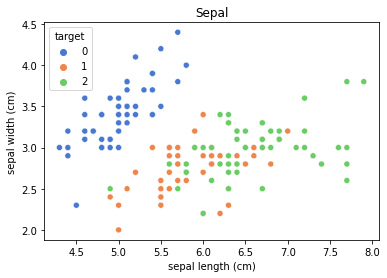

In [14]:
sns.scatterplot('sepal length (cm)', 'sepal width (cm)', hue='target', palette='muted',data=df_iris)
plt.title('Sepal')
plt.show()

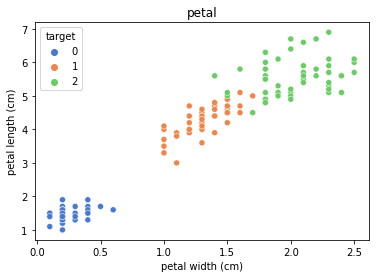

In [15]:
# petal data로 보는 꽃 종류
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted',data=df_iris)
plt.title('petal')
plt.show()

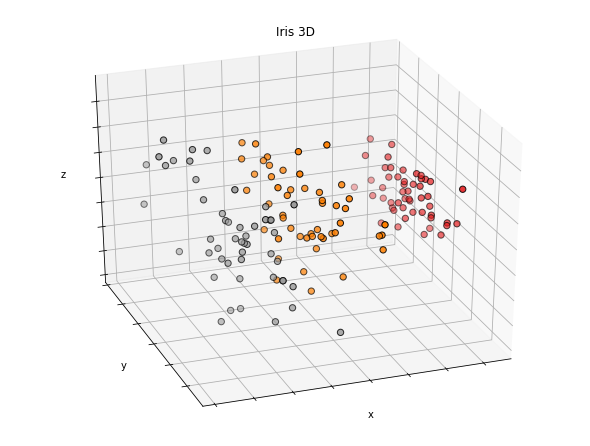

In [16]:
# 3D plot으로 보는 꽃 종류 (PCA 이용)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig=plt.figure(figsize=(8,6))
ax=Axes3D(fig,elev=-150,azim=110)
X_reduced=PCA(n_components=3).fit_transform(df_iris.drop('target',1))
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=df_iris['target'],
           cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

# **1. training set/validation set 나누기**

In [17]:
from sklearn.model_selection import train_test_split

# 데이터를 적절히 분리하기 위해서는 train_test_split() 함수를 사용해야한다.
# 이는 값을 나눠서 반환하는 함수이다.

In [18]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'])
# x_train, x_valid에는 feature 데이터 4개의 컬럼만 들어가야 하니, 
# 'target'컬럼(axis=1)을 지워주는 drop()함수 사용

# x_train, x_valid에는 4개의 feature 데이터가 들어가고
# y_train,y_valid에는 1개(target)의 데이터가 들어간다. 

x_train, x_valid = feature 데이터

y_train, y_valid = label 데이터

x_train(feature 데이터)와 y_train(target 데이터)은 학습(훈련) 데이터로 쓰일 데이터이고,

x_valid(feature 데이터)와 y_valid(target 데이터)는 예측 데이터로 쓰일 데이터이다.

x_train, y_train에는 df_iris.drop('target',1)이 분배

x_valid, y_valid에는 df_iris['target']이 분배된다.

In [19]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [20]:
x_valid.shape,y_valid.shape

((38, 4), (38,))

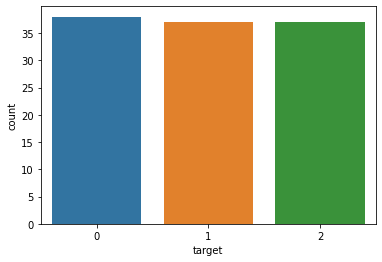

In [21]:
sns.countplot(y_train)

'target'값이 0,1,2인 데이터가 Original dataset으로부터 랜덤으로 뽑히기 때문에 **비율의 차이가 존재**할 수 있다. 따라서 기계학습할 때, **sample size가 큰 데이터 위주로 학습**하여 **모델의 예측성능이 떨어질** 수 있다.

위 상황에서, 학습된 머신러닝 모델이 sample size가 큰 target=1인 경우를 좀 더 잘 예측하고, target=2에 대한 예측도가 떨어질 수 있다.

이를 방지하기 위해 우리는 **stratify 옵션**을 이용하여 **label의 class 분포를 균등하게 배분**한다.

In [22]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'],stratify=df_iris['target'])
# stratify 옵션을 넣지않으면 위의 막대그래프는 실행시킬 때마다 변한다.

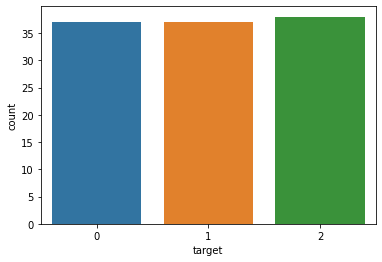

In [23]:
sns.countplot(y_train)

In [24]:
# 먼저 x_train은 4개의 feature이고, (80%)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
19,5.1,3.8,1.5,0.3
76,6.8,2.8,4.8,1.4
94,5.6,2.7,4.2,1.3
105,7.6,3.0,6.6,2.1
...,...,...,...,...
147,6.5,3.0,5.2,2.0
97,6.2,2.9,4.3,1.3
124,6.7,3.3,5.7,2.1
115,6.4,3.2,5.3,2.3


In [25]:
# x_valid는 또 4개의 feature이다. (20%)
x_valid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
87,6.3,2.3,4.4,1.3
0,5.1,3.5,1.4,0.2
131,7.9,3.8,6.4,2.0
143,6.8,3.2,5.9,2.3
33,5.5,4.2,1.4,0.2
92,5.8,2.6,4.0,1.2
98,5.1,2.5,3.0,1.1
57,4.9,2.4,3.3,1.0
113,5.7,2.5,5.0,2.0


In [26]:
# y_train에는 'target'컬럼만 (80%)
y_train

29     0
19     0
76     1
94     1
105    2
      ..
147    2
97     1
124    2
115    2
95     1
Name: target, Length: 112, dtype: int64

In [27]:
# y_valid에도 'target'컬럼만 (20%)
y_valid

1      0
87     1
0      0
131    2
143    2
33     0
92     1
98     1
57     1
113    2
107    2
79     1
63     1
18     0
81     1
100    2
82     1
125    2
35     0
136    2
26     0
90     1
7      0
4      0
52     1
9      0
102    2
110    2
12     0
5      0
47     0
134    2
148    2
139    2
70     1
85     1
88     1
31     0
Name: target, dtype: int64

# **2. 하이퍼 파라미터(hyper-parameter) 튜닝**

모델 학습할 때, 설정한 옵션들은 **하이퍼 파라미터(hyper-parameter)**라고 한다.

설정한 값에 따라 모델 성능도 달라질 수 있다.

각 알고리즘 별, hyper-parameter의 종류가 매우 다양하다. 

다음 두 가지 parameter는 기본적으로 설정해주는 것이 좋다.

*   random_state: sampling seed 설정(항상 동일하게 sampling 하기)
*   n_jobs=-1: CPU를 모두 사용(학습속도가 빠름)



# **3. 분류 알고리즘**

### **3-1. Logistic Regression**

Logistic Regression, SVM(Support Vector Machine)과 같은 알고리즘은 이진(Binary Class) 분류만 가능하다. (2개의 클래스 판별만 가능하다.)

하지만, 3개 이상의 클래스에 대한 판별 [다중 클래서(Multi-Class)분류]을 진행하는 경우, 다음과 같은 전략으로 판별한다.

*   **one-vs-one(OvO)**: K개의 클래스가 존재할 때, 이 중 2개의 클래스 조합을 선택하여 K(K-1)/2 개의 이진 클래스 분류 문제를 풀고 이진판별을 통해 가장 많은 판별값을 얻은 클래스를 선택하는 방법이다.
*   **one-vs-rest(OvR)**: K개의 클래스가 존재할 때, 클래스들을 "k번째 클래스(one)" & "나머지(rest)"로 나누어서 K개의 개별 이진 분류 문제를 푼다. 즉, 각각의 클래스에 대해 표본이 속하는지(y=1) 속하지 않는지(y=0)의 이진 분류 문제를 푸는 것이다. OvO와 달리 클래스 수만큼의 이진 분류 문제를 풀면 된다.

대부분 OvsR 전략을 선호한다.



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# step 1: 모델 선언
lr=LogisticRegression(random_state=0)

In [30]:
# step 2: 모델 학습
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [31]:
# step 3: 예측
prediction=lr.predict(x_valid)

In [32]:
prediction[:5]

array([0, 1, 0, 2, 2])

In [33]:
# step 4: 평가
(prediction==y_valid).mean() # 정확도

# 정확도는 1에 가까울수록 좋다.

0.9736842105263158

### **3-2. SGD(SGDClassifier)**

**Stochastic Gradient descent(SGD): 확률적 경사 하강법**

In [34]:
from IPython.display import Image

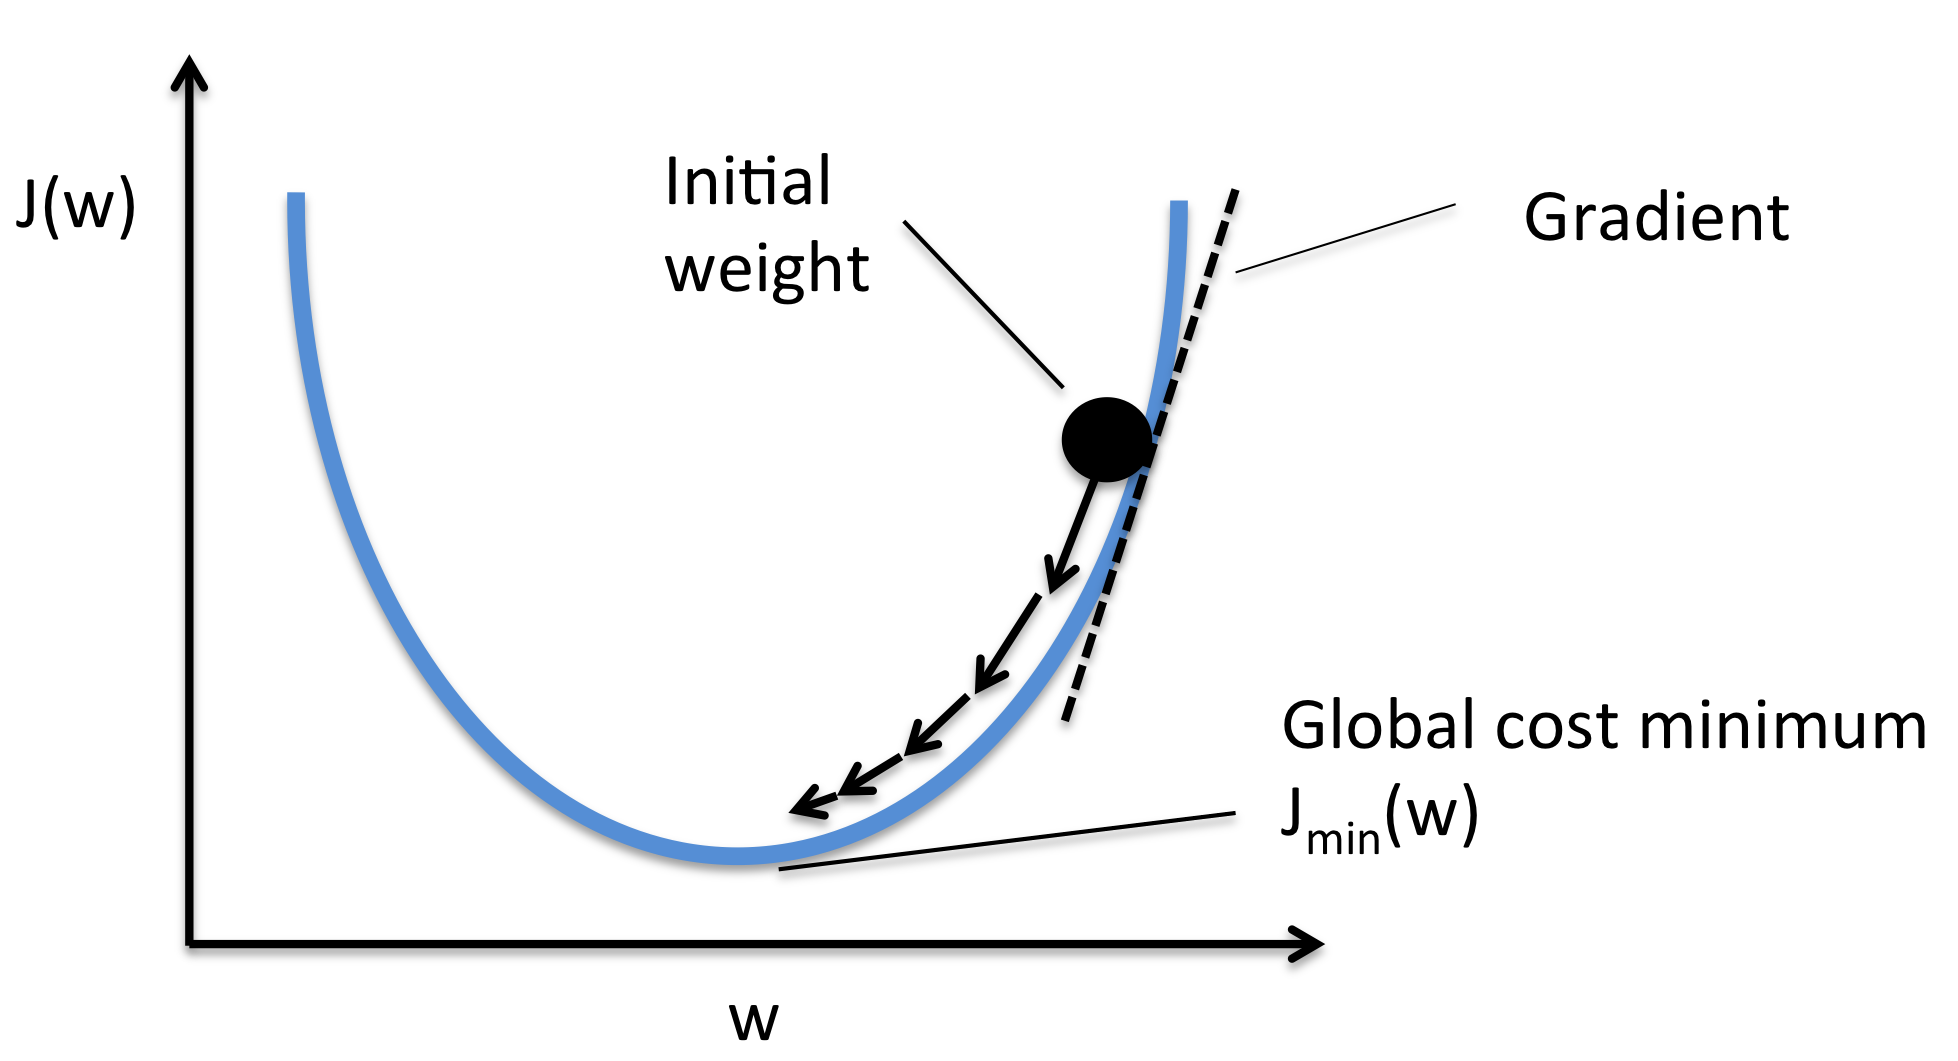

In [35]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
# step 1: 모델 선언
sgd=SGDClassifier(random_state=0)

In [38]:
# step 2: 모델 학습
sgd.fit(x_train,y_train)

SGDClassifier(random_state=0)

In [39]:
# step 3: 예측
prediction=sgd.predict(x_valid)

In [40]:
(prediction==y_valid).mean()

0.9210526315789473

In [41]:
# Change hyper-parameter values:
# e.g.: penalty='l1', random_state=1, n_jobs=-1
sgd2=SGDClassifier(penalty='l1',random_state=1,n_jobs=-1)

In [42]:
sgd2.fit(x_train,y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=1)

In [43]:
prediction2=sgd2.predict(x_valid)

In [44]:
prediction2 # 예측값들은 모두 prediction2에 저장된다.

array([0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0])

In [45]:
(prediction2==y_valid).mean() # 정확도가 향상된 것을 확인할 수 있다.

0.8421052631578947

In [46]:
# 성능 검사, 이렇게도 할 수 있다.
from sklearn.metrics import accuracy_score
print("정답률: ", accuracy_score(y_valid,prediction2))

# 예측 데이터인 x_valid를 넣어서 예측한 결과값과 y_valid(예측 결과 데이터로 주어졌던)가
# 일치하는지 비교하여 정답률을 출력해보자.
# sklearn.metrics 모듈의 accuracy_score() 함수를 사용한다.

정답률:  0.8421052631578947


### **3-3. KNN(KNeighborsClassifier)**

KNN(K Nearest Neighbors): K 최근접 이웃 알고리즘

새로운 데이터의 분류 결과가 K개 최근접 이웃의 클래스에 의해서 결정되며, 데이터는 가장 많이 할당되는 클래스로 분류하게 된다.

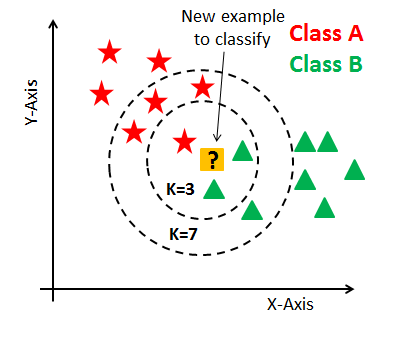

In [47]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# step 1: 모델 선언
knn=KNeighborsClassifier()

In [50]:
# step 2: 모델 학습
knn.fit(x_train,y_train) # default: n_neighbors=5

KNeighborsClassifier()

In [51]:
# step 3: 예측
prediction=knn.predict(x_valid)

In [52]:
# step 4: 평가
(prediction==y_valid).mean()

0.9736842105263158

In [53]:
accuracy_score(y_valid,prediction)

0.9736842105263158

### **3-4. SVM (SVC)**


*   새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.
*   경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘



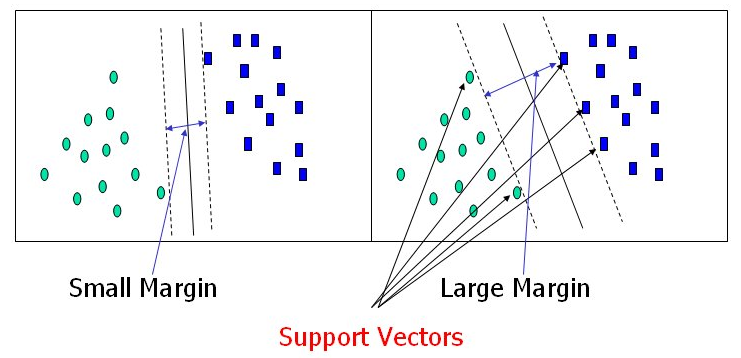

In [54]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

SVM은 Logistic Regression과 같이 이진 분류만 가능하다. (2개의 클래스 판별만 가능)

3개 이상의 클래스인 경우: **OvsR 전략** 사용

In [55]:
from sklearn.svm import SVC 
# SVC: Support Vector Classification

In [56]:
# step 1: 모델 선언
svc=SVC(random_state=0)

In [57]:
# step 2: 모델 학습
svc.fit(x_train,y_train)

SVC(random_state=0)

In [58]:
# step 3: 예측
svc_prediction=svc.predict(x_valid)

In [59]:
svc # hyper-parameter 확인

# colab에서는 출력하면 나오지 않기 때문에 import 선언할 때 SVC에 마우스 커서를 놓으면
# 튜닝할 수 있는 요소들을 확인할 수 있다.

SVC(random_state=0)

In [60]:
# step 4: 평가
(svc_prediction==y_valid).mean()

0.9736842105263158

각 클래스 별 확률값을 return 해주는 decision_function()

In [61]:
svc.decision_function(x_valid)
# []안에서 확률이 클수록 어느 target에 포함되어 있는지 알 수 있다.
# [-0.23434096,  1.09273856,  2.22154431]는 target 2라는 의미이다.
# 그래서 아래의 코드의 결과를 보면 첫 번째가 2라는 것을 확인할 수 있다.

array([[ 2.23117979,  1.14501308, -0.25068385],
       [-0.22474429,  2.22613871,  0.98720073],
       [ 2.23520601,  1.14308938, -0.25299431],
       [-0.2043795 ,  0.86284172,  2.23183317],
       [-0.23029974,  0.88331353,  2.24500487],
       [ 2.23517404,  1.14079153, -0.25256572],
       [-0.20574476,  2.23530054,  0.85313029],
       [ 0.92373347,  2.23062022, -0.22028553],
       [-0.12773206,  2.22980023,  0.79495463],
       [-0.23835767,  1.1468942 ,  2.21086433],
       [-0.22407283,  0.88157104,  2.24078933],
       [-0.16272535,  2.24151425,  0.791206  ],
       [-0.22718054,  2.21108777,  1.09749138],
       [ 2.22326584,  1.18730185, -0.25601279],
       [-0.18391379,  2.23851441,  0.81257   ],
       [-0.23157959,  0.8493114 ,  2.25205075],
       [-0.19863177,  2.23666904,  0.83554955],
       [-0.22573283,  0.94230534,  2.23254288],
       [ 2.23700076,  1.12260097, -0.25086632],
       [-0.23216262,  0.92595879,  2.24023159],
       [ 2.2277883 ,  1.16368583, -0.252

In [62]:
svc_prediction
# 확률값이 제일 높은 클래스로 분류(예측)된 것을 확인할 수 있다.

array([0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0])

### **3-5. Decision Tree (DecisionTreeClassifier)**

**1. Decision Tree(의사 결정 나무): 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것**

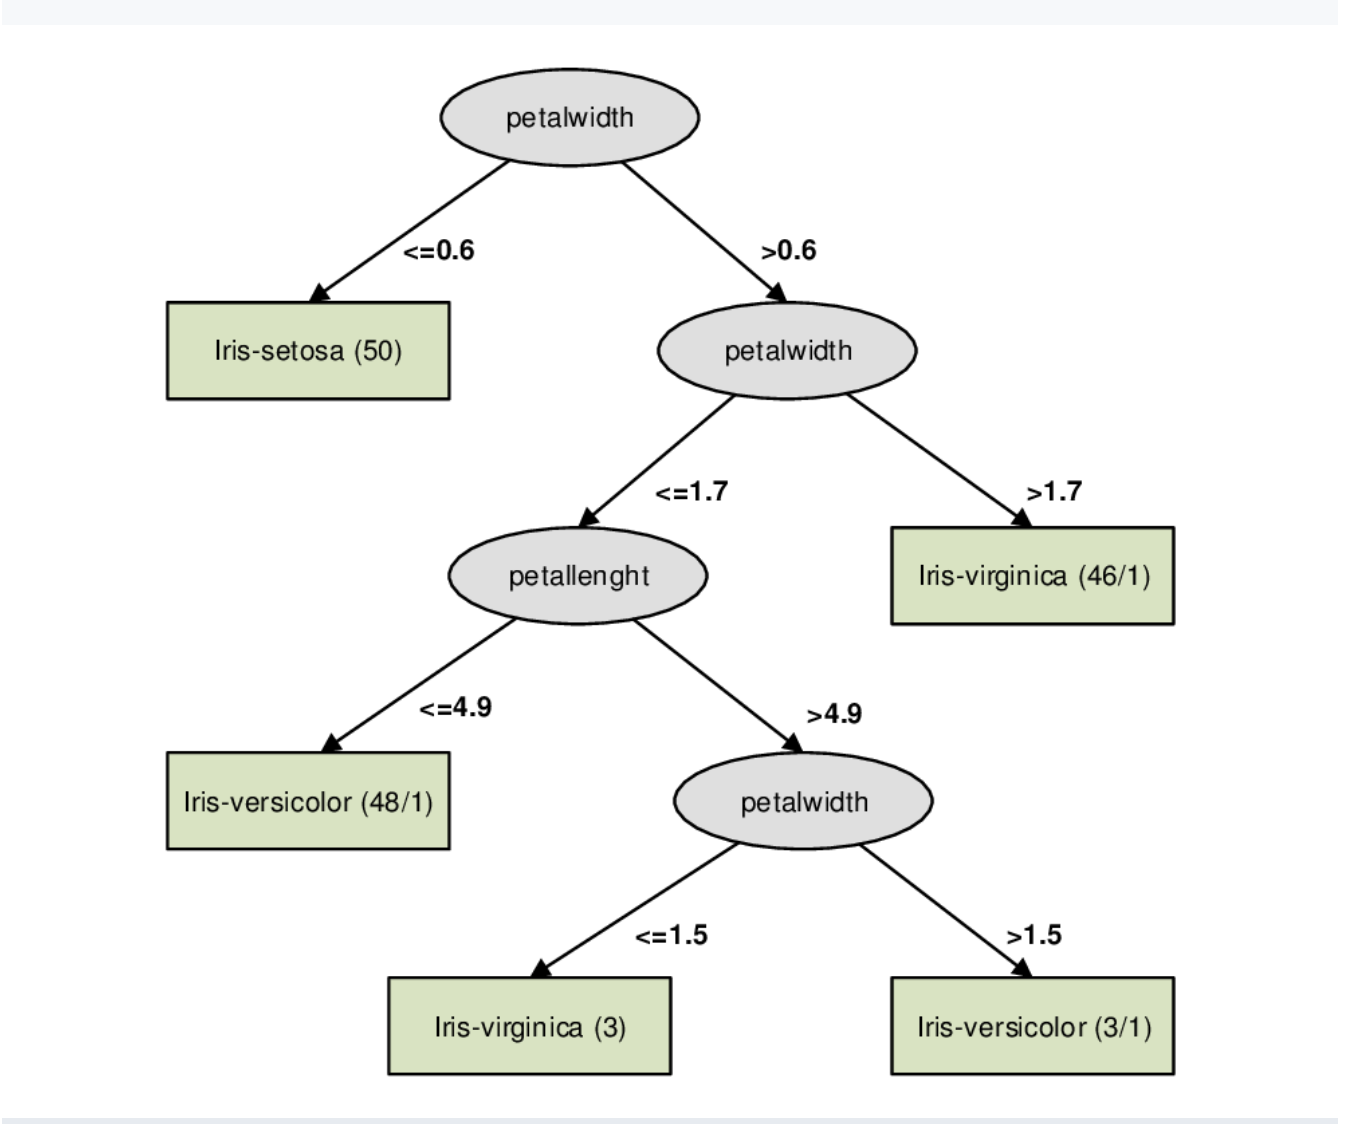

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# step 1: 모델 선언
dt=DecisionTreeClassifier()

In [65]:
# step 2: 모델 학습
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
# step 3: 모델 예측
dt_pred=dt.predict(x_valid)

In [67]:
# step 4: 평가
(dt_pred==y_valid).mean()

0.9473684210526315

**2. Decision Tree 분류 결과 시각화**

In [68]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import numpy as np

In [69]:
# 방법 1: pydot을 사용하여 "dot 파일"을 "png 이미지"로 전환
# pip install pydot

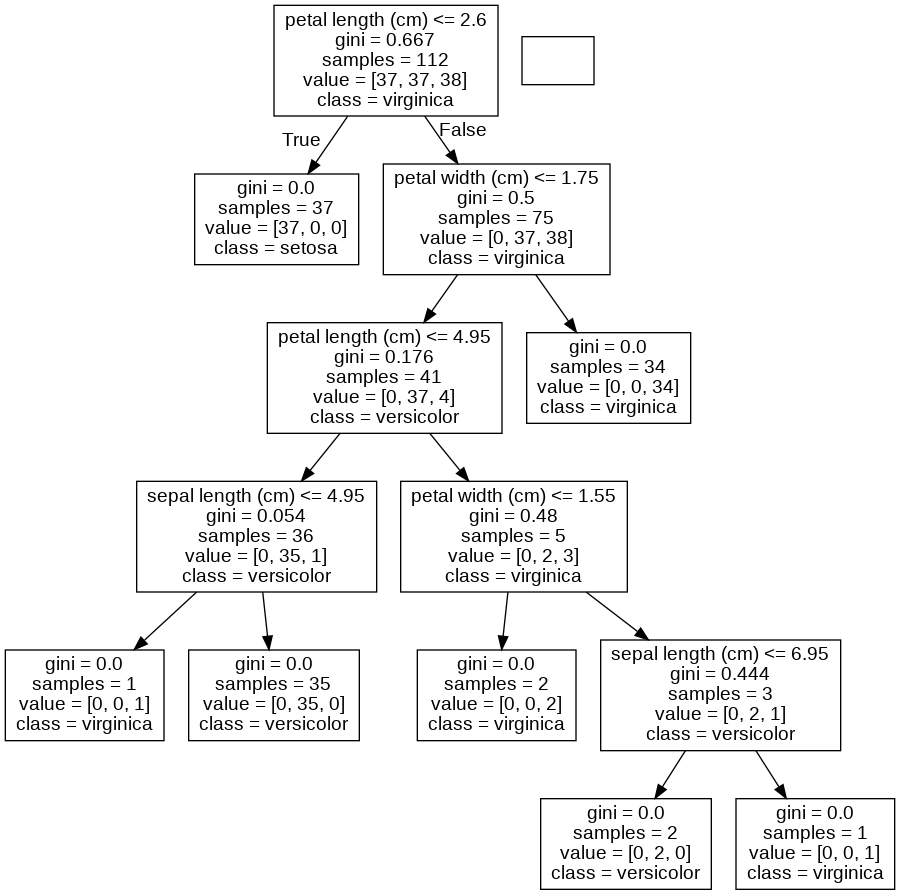

In [70]:
# 참고: https://niceman.tistory.com/169
import pydot

# .dot결과 생성
export_graphviz(dt, out_file='tree.dot', feature_names=feature_names, class_names=np.unique(iris['target_names']))

# Encoding
(graph,) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')

# .dot파일을 .png이미지로 저장
graph.write_png('tree.png')

Image(filename = 'tree.png', width=600)

In [71]:
# 방법 2: graphviz.Source 이용
# pip install -U graphviz

In [72]:
import graphviz

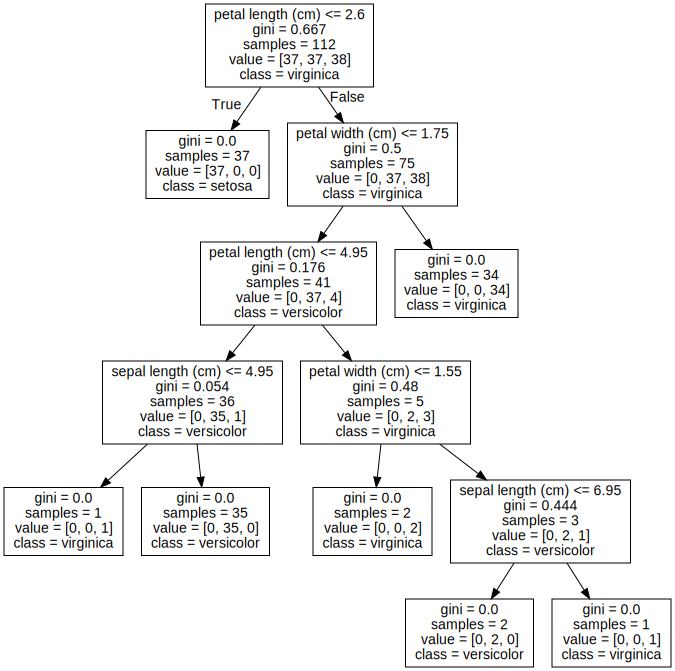

In [73]:
# 참고: https://www.kaggle.com/vaishvik25/titanic-eda-fe-3-model-decision-tree-viz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_dot = export_graphviz(dt,out_file=None, feature_names=feature_names, class_names=np.unique(iris['target_names']))
tree = graphviz.Source(tree_dot)
tree

**3. 가지 치기(pruning)**

overfitting을 방지하기 위해 적당히 가지 치기를 진행한다.

In [74]:
# 수동으로 max_depth 설정(parameter 튜닝)
# step 1: 모델 선언
dt2=DecisionTreeClassifier(max_depth=2)

In [75]:
# step 2: 모델 학습
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [76]:
# step 3: 예측
dt2_pred=dt2.predict(x_valid)

In [77]:
# step 4: 평가
(dt2_pred==y_valid).mean()

0.9473684210526315

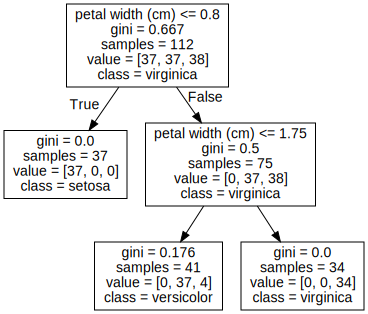

In [78]:
tree2_dot=export_graphviz(dt2,out_file=None, feature_names=feature_names, class_names=np.unique(iris['target_names']))
tree2=graphviz.Source(tree2_dot)
tree2

# **4. 모델 성능 평가 지표**
### **4-1. 오차 행렬(Confusion Matrix)**

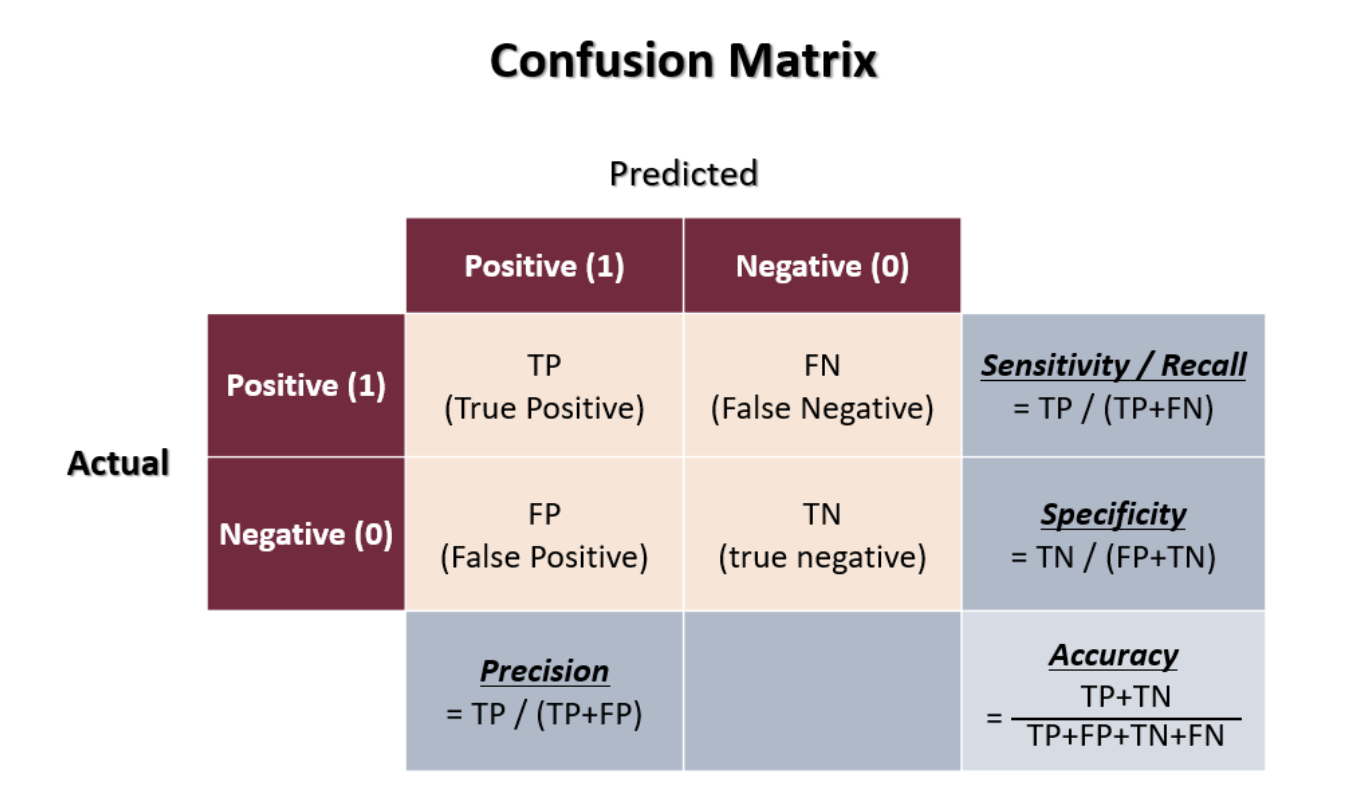

### **4-2. 정확도(Accuracy)**

**정확도(Accuracy)**: 모델이 샘플을 올바르게 예측하는 비율

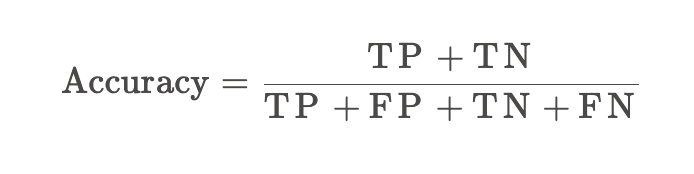

**정확도의 함정**

정확도는 모델의 성능을 가장 직관적으로 나타낼 수 있는 평가 지표.

하지만, 만약 Actual positive sample과 Actual negative sample의 비율이 차이가 많이 나면 **정확도의 함정**에 빠질 수 있다.

즉, **모두 positive/negative로 예측**했을 때 모델의 정확도가 매우 높은 경우다. 이 경우에 예측 정확도가 높지만, 모델의 예측 성능이 좋다라고 말할 수는 없다.

In [86]:
# 유방암 환자 데이터셋을 이용해 이해해보자.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [82]:
cancer=load_breast_cancer()

In [83]:
print(cancer['DESCR']) # describe

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [88]:
data=cancer['data']
target=cancer['target']
feature_names=cancer['feature_names']

In [89]:
# 데이터프레임 생성
df=pd.DataFrame(data=data,columns=feature_names)
df['target']=target

In [93]:
target # 클래스가 두 개이기 때문에 0,1이다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [90]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [96]:
pos=df.loc[df['target']==1] # 양성 sample
neg=df.loc[df['target']==0] # 음성 sample
# 0: Malignant(악성종양), 1: Benign(양성종양)

In [97]:
pos.shape, neg.shape

((357, 31), (212, 31))

In [98]:
# 시범용 sample data를 생성: 양성 환자 357 + 음성 환자 5
sample=pd.concat([pos,neg[:5]],sort=True)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(sample.drop('target',1),sample['target'],random_state=42)

In [101]:
x_train.shape,y_train.shape

((271, 30), (271,))

In [102]:
x_test.shape,y_test.shape

((91, 30), (91,))

In [104]:
# 모델 정의 및 학습
model=LogisticRegression()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)

In [105]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model_pred)

array([[ 1,  0],
       [ 2, 88]])

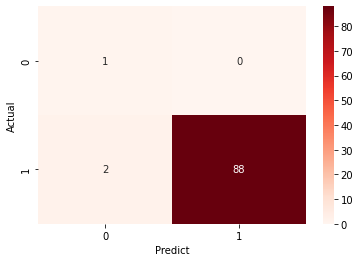

In [107]:
sns.heatmap(confusion_matrix(y_test,model_pred),annot=True,cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [108]:
# 정확도(Accuracy)
# logistic 모델 정확도
(model_pred==y_test).mean()

0.978021978021978

In [110]:
# 모두 양성으로 예측한 경우
my_pred=np.ones(shape=y_test.shape)

In [112]:
# 정확도
(my_pred==y_test).mean()

0.989010989010989

정확도만 놓고 본다면, 무조건 양성 환자로 예측하는 분류기가 성능이 더 좋다. 하지만 무조건 양성 환자로 예측해서 예측률이 98.9%로 말하는 의사는 당연히 자질이 좋은 의사라고 볼 수 없다.

정확도만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있다.

이를 보완하기 위해 다음과 같은 지표들도 같이 활용하게 된다.

### **정밀도(Precision)**
**정밀도(Precision)**: 양성 예측의 정확도. 즉, Positive Prediction 중에서 올바르게 예측되는 비율

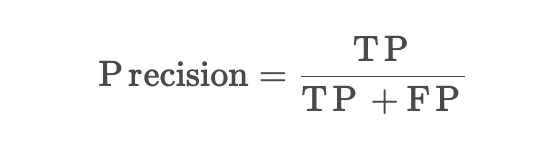

In [113]:
from sklearn.metrics import precision_score

In [114]:
precision_score(y_test,model_pred)

1.0

### **4-4. 민감도(Sensitivity) / 재현율(Recall)**

**민감도(Sensitivity) / 재현율(Recall)**

분류기가 양성 샘플에 대한 식별력을 나타냄. 즉, Positive Condition 중에서 올바르게 예측되는 비율. True Positive Rate (TPR)이라고도 불린다.

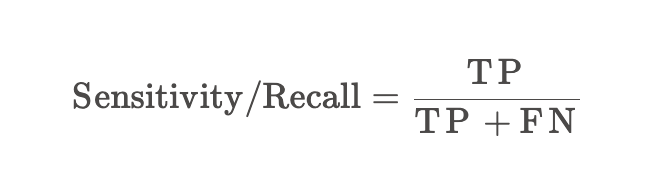

In [115]:
from sklearn.metrics import recall_score
recall_score(y_test,model_pred)

0.9777777777777777

### **4-5. 특이도(Specifictity)**

**특이도(Specifictity)**: 분류기가 음성 샘플에 대한 식별력을 나타냄. 즉, Negative Condition 중에서 올바르게 예측되는 비율. True Negative Rate(TNR)이라고 불린다.

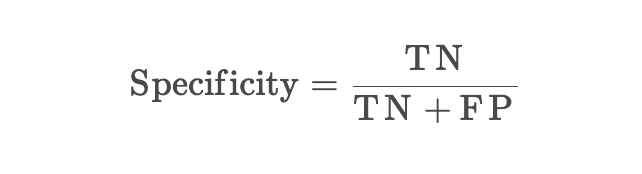

### **4-6. F1 Score**

**F1 Score**: 정밀도와 재현율의 조화 평균을 나타내는 지표. 

데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있다.

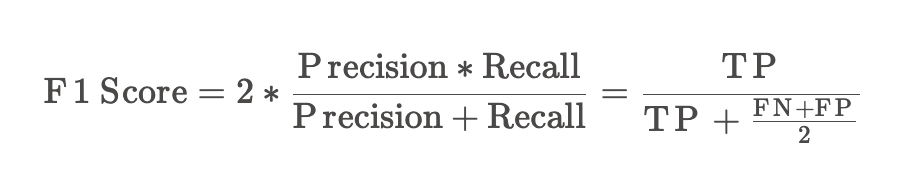

In [116]:
from sklearn.metrics import f1_score

In [117]:
f1_score(y_test,model_pred)

0.9887640449438202

### 참고자료
Author: Hyemin Kim
Link: https://hyemin-kim.github.io/2020/07/26/S-Python-sklearn2/
Copyright Notice: All articles in this blog are licensed under CC BY-NC-SA 4.0 unless stating additionally.

https://thisisprogrammingworld.tistory.com/64